# <center>PyTen Package Tutorial</center>
#### <center>Texas A&M University HELIOS Group</center>

## Import PyTen Packge

In [1]:
import pyten

## Quick Start

In [23]:
# This is a quick start without prior input
[OriTensor, DeTensor, TenClass, RecTensor] = pyten.UI.helios()

KeyboardInterrupt: Interrupted by user

Show Results as follows:
* Original Tensor

In [ ]:
print OriTensor  # Original Tensor

* Full Tensor reconstructed by decomposed matrices

In [ ]:
print DeTensor.data  # Full Tensor reconstructed by decomposed matrices

* Final Decomposition Results e.g. Ttensor or Ktensor

In [ ]:
print TenClass  # Final Decomposition Results e.g. Ttensor or Ktensor

* Recovered Tensor (Completed Tensor)

In [ ]:
print RecTensor.data  # Recovered Tensor (Completed Tensor)

## Four UI Functions For Four Scenarios
### Scenario 1: Basic Tensor completion or decomposition.

In [ ]:
[OriTensor, DeTensor, TenClass, RecTensor] = pyten.UI.basic()

### Scenario 2: Tensor completion or decomposition with auxiliary information

In [ ]:
[OriTensor, DeTensor, TenClass, RecTensor] = pyten.UI.auxiliary()

### Scenario 3: Dynamic/Online/Streaming Tensor completion or decomposition

In [ ]:
[OriTensor, DeTensor, TenClass, RecTensor] = pyten.UI.dynamic()

### Scenario 4: Scalable Tensor completion or decomposition

In [ ]:
[OriTensor, DeTensor, TenClass, RecTensor] = pyten.UI.scalable()

## Usage of Main Functions
### Function: create
1. Create Tensor Completion Problem

In [2]:
from pyten.tools import create  # Import the problem creation function

problem = 'basic'  # Problem Definition
siz = [20, 20, 20]  # Size of the Created Synthetic Tensor
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
tp = 'CP'  # Solution Format (Creating Method) of the Created Synthetic Tensor
[X1, Omega1, sol1] = create(problem, siz, r, miss, tp)

### Scenario 1: Basic Tensor Completion/Decomposition
#### 1. Solve Synthetic Completion Problem

In [5]:
from pyten.tools import create  # Import the problem creation function

problem = 'basic'  # Define Problem As Basic Tensor Completion Problem
siz = [20, 20, 20]  # Size of the Created Synthetic Tensor
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
tp = 'CP'  # Define Solution Format of the Created Synthetic Tensor As 'CP decomposition'
[X1, Omega1, sol1] = create(problem, siz, r, miss, tp)

print(X1.data)
print(Omega1)

# Basic Tensor Completion with methods: CP-ALS,Tucker-ALS, FaLRTC, SiLRTC, HaLRTC, TNCP
from pyten.method import *

r = 4  # Rank for CP-based methods
R = [4, 4, 4]  # Rank for tucker-based methods
# CP-ALS
[T1, rX1] = cp_als(X1, r, Omega1)  # if no missing data just omit Omega1 by using [T1,rX1]=cp_als.cp_als(X1,r)
# print sol1.totensor().data
# print rX1.data

# Tucker-ALS
[T2, rX2] = tucker_als(X1, R, Omega1)  # if no missing data just omit Omega1
# FalRTC, SiLRTC, HaLRTC
rX3 = falrtc(X1, Omega1)
rX4 = silrtc(X1, Omega1)
rX5 = halrtc(X1, Omega1)
# TNCP
self1 = TNCP(X1, Omega1, rank=r)
self1.run()

# Error Testing
from pyten.tools import tenerror

realX = sol1.totensor()
[Err1, ReErr11, ReErr21] = tenerror(rX1, realX, Omega1)
[Err2, ReErr12, ReErr22] = tenerror(rX2, realX, Omega1)
[Err3, ReErr13, ReErr23] = tenerror(rX3, realX, Omega1)
[Err4, ReErr14, ReErr24] = tenerror(rX4, realX, Omega1)
[Err5, ReErr15, ReErr25] = tenerror(rX5, realX, Omega1)
[Err6, ReErr16, ReErr26] = tenerror(self1.X, realX, Omega1)
print('n', 'The Relative Error of the Six Methods are:', ReErr21, ReErr22, ReErr23, ReErr24, ReErr25, ReErr26)


[[[0.         0.77092154 0.         ... 0.         0.16924281 0.6819285 ]
  [0.59352324 0.         0.         ... 0.47595792 0.         0.        ]
  [0.         0.8866693  0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.20250643 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.54785629 0.         0.        ]
  [0.84116971 0.         0.20556973 ... 0.         0.         0.        ]
  [0.         0.37268563 0.         ... 0.42437564 0.         0.19603867]
  ...
  [0.         0.         0.         ... 0.         0.34532741 0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.30907995 0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.499273

#### 2. Real Problem - Image Recovery

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


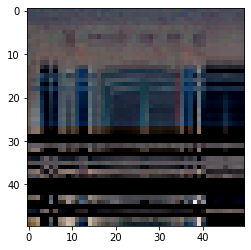

In [9]:
plt.imshow(realX.data/255)
plt.imshow(rX1.data/255)
#plt.imshow(rX2.data)[]


CP_ALS:

CP_ALS: iterations=100, f-delta=8.153829171823801
CP_ALS: iterations=200, f-delta=4.522801191190944
CP_ALS: iterations=300, f-delta=3.6485505994166094
CP_ALS: iterations=400, f-delta=2.4110865681806533
CP_ALS: iterations=500, f-delta=2.0287559292075974
CP_ALS: iterations=600, f-delta=1.8621534188759181
CP_ALS: iterations=700, f-delta=1.7413019506799456
CP_ALS: iterations=800, f-delta=1.6551360528525574
CP_ALS: iterations=900, f-delta=1.587770803955524
CP_ALS: iterations=1000, f-delta=1.5331961194560526

Tucker Alternating Least-Squares:



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Tucker_ALS: iterations=100, fit = 0.46602623845271274, fit-delta = 0.16239822019674943


 The Relative Error of the Six Methods are: 0.8380539071808896 1.0415478801914624


TypeError: Image data of dtype complex128 cannot be converted to float

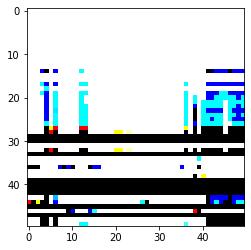

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Use it to load image
import numpy as np

lena = mpimg.imread("test/testImg.png")
im = np.double(np.uint8(lena * 255))
im = im[0:50, 0:50, 0:3]

from pyten.tenclass import Tensor  # Use it to construct Tensor object

X1 = Tensor(im)  # Construct Image Tensor to be Completed
X0 = X1.data.copy()
X0 = Tensor(X0)  # Save the Ground Truth
Omega1 = (im < 100) * 1.0  # Missing index Tensor
X1.data[Omega1 == 0] = 0

# Basic Tensor Completion with methods: CP-ALS, Tucker-ALS, FaLRTC, SiLRTC, HaLRTC, TNCP
from pyten.method import *

r = 4
R = [10, 10, 3]  # Rank for tucker-based methods
[T1, rX1] = cp_als(X1, r, Omega1, maxiter=1000, printitn=100)
[T2, rX2] = tucker_als(X1, R, Omega1, max_iter=100, printitn=100)
alpha = np.array([1.0, 1.0, 1e-3])
alpha = alpha / sum(alpha)
#rX3 = falrtc(X1, Omega1, max_iter=100, alpha=alpha)
#rX4 = silrtc(X1, Omega1, max_iter=100, alpha=alpha)
#rX5 = halrtc(X1, Omega1, max_iter=100, alpha=alpha)
#self1 = TNCP(X1, Omega1, rank=r)
#self1.run()

# Error Testing
from pyten.tools import tenerror

realX = X0
[Err1, ReErr11, ReErr21] = tenerror(rX1, realX, Omega1)
[Err2, ReErr12, ReErr22] = tenerror(rX2, realX, Omega1)
#[Err3, ReErr13, ReErr23] = tenerror(rX3, realX, Omega1)
#[Err4, ReErr14, ReErr24] = tenerror(rX4, realX, Omega1)
#[Err5, ReErr15, ReErr25] = tenerror(rX5, realX, Omega1)
#[Err6, ReErr16, ReErr26] = tenerror(self1.X, realX, Omega1)
print('\n', 'The Relative Error of the Six Methods are:', ReErr21, ReErr22)#, ReErr23, ReErr24, ReErr25, ReErr26)
plt.imshow(realX.data)
plt.imshow(rX1.data)
plt.imshow(rX2.data)

### Scenario 2: Tensor Completion/Decomposition with Auxiliary Information
#### 1. Use  AirCP Method to solve Tensor Completion With Auxiliary Similarity Matrices

In [ ]:
from pyten.method import AirCP  # Import AirCP
from pyten.tools import create  # Import the problem creation function

problem = 'auxiliary'  # Define Problem As Basic Tensor Completion Problem
siz = [20, 20, 20]  # Size of the Created Synthetic Tensor
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
tp = 'sim'  # Define Auxiliary Information As 'Similarity Matrices'
# Construct Similarity Matrices (if 'None', then it will use the default Similarity Matrices)
# aux = [np.diag(np.ones(siz[n]-1), -1)+np.diag(np.ones(siz[n]-1), 1) for n in range(dims)]
aux = None
[X1, Omega1, sol1, sim_matrices] = create(problem, siz, r, miss, tp, aux=aux)

self = AirCP(X1, Omega1, r, sim_mats=sim_matrices)
self.run()
# self_no_aux = AirCP(X1, Omega1, r)
# self_no_aux.run()

# Error Testing
from pyten.tools import tenerror

realX = sol1.totensor()
[Err1, ReErr11, ReErr21] = tenerror(self.X, realX, Omega1)
# [Err2, ReErr12, ReErr22] = tenerror(self_no_aux.X, realX, Omega1)
print '\n', 'The Relative Error of the Two Methods are:', ReErr11


#### 2. Use  CMTF Method to solve Tensor Completion With Coupled Matrices

In [ ]:
from pyten.method import cmtf
from pyten.tools import create  # Import the problem creation function
import numpy as np

problem = 'auxiliary'  # Define Problem As Basic Tensor Completion Problem
siz = [20, 20, 20]  # Size of the Created Synthetic Tensor
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
tp = 'couple'  # Define Auxiliary Information As 'Similarity Matrices'
# Construct Similarity Matrices (if 'None', then it will use the default Similarity Matrices)
dims = 3
[X1, Omega1, sol1, coupled_matrices] = create(problem, siz, r, miss, tp)

[T1, Rec1, V1] = cmtf(X1, coupled_matrices, [1, 2, 3], r, Omega1, maxiter=500)
# [T2, Rec2, V2] = cmtf(X1, None, None, r, Omega1, maxiter=500)
fit_coupled_matrices_1 = [np.dot(T1.Us[n], V1[n].T) for n in range(dims)]

# Error Testing
from pyten.tools import tenerror

realX = sol1.totensor()
[Err1, ReErr11, ReErr21] = tenerror(Rec1, realX, Omega1)
# [Err1, ReErr12, ReErr22] = tenerror(Rec2, realX, Omega1)
print '\n', 'The Relative Error of the Two Methods are:', ReErr11


### Scenario 3: Dynamic Tensor Decomposition/Completion

In [ ]:
from pyten.method import onlineCP, OLSGD
from pyten.tools import create  # Import the problem creation function
from pyten.tools import tenerror
import numpy as np

problem = 'dynamic'  # Define Problem As Dynamic Tensor Completion Problem
time_steps = 10  # Define the Number of Total Time Steps
siz = np.array([[1, 50, 50] for t in range(time_steps)])
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
# Create a Dynmaic Tensor Completion Problem
[X1, Omega1, sol1, siz, time_steps] = create(problem, siz, r, miss, timestep=time_steps)

for t in range(time_steps):
    if t == 0:  # Initial Step
        print('Initial Step\n')
        self1 = OLSGD(rank=r, mu=0.01, lmbda=0.1)  # OLSGD assume time is the first mode.
        self1.update(X1[t], Omega1[t])  # Complete the initial tensor using OLSGD method.
        # onlineCP assume time is the last mode.
        self = onlineCP(X1[t].permute([1, 2, 0]), rank=r, tol=1e-8, printitn=0)  # Just decompose without completion using onlineCP
    else:
        if t==1:
            print('Update Step\n')
        self1.update(X1[t], Omega1[t])  # Update Decomposition as well as Completion using OLSGD.
        self.update(X1[t].permute([1, 2, 0]))  # Update Decomposition of onlineCP.
    # Test Current Step OLSGD Completion Error
    realX = sol1[t].totensor()
    [Err1, ReErr11, ReErr21] = tenerror(self1.recx, realX, Omega1[t])
    print 'OLSGD Recover Error at Current Step:', Err1, ReErr11, ReErr21



### Scenario 4: Scalable Tensor Completion/Decomposition

#### 1. Solve Synthetic Completion Problem

In [ ]:
from pyten.tools import create  # Import the problem creation function

problem = 'basic'  # Define Problem As Basic Tensor Completion Problem
siz = [20, 20, 20]  # Size of the Created Synthetic Tensor
r = [4, 4, 4]  # Rank of the Created Synthetic Tensor
miss = 0.8  # Missing Percentage
tp = 'CP'  # Define Solution Format of the Created Synthetic Tensor As 'CP decomposition'
[X1, Omega1, sol1] = create(problem, siz, r, miss, tp)

# Basic Tensor Completion with methods: CP-ALS,Tucker-ALS, FaLRTC, SiLRTC, HaLRTC, TNCP
from pyten.method import *

r = 4  # Rank for CP-based methods
R = [4, 4, 4]  # Rank for tucker-based methods

# Distributed CP_ALS
self0 = TensorDecompositionALS()
self0.dir_data = X1  # Could also be '.csv' or '.txt' format, e.g. 'test/syntensor.csv', 'test/tensor_10x10x10_101.txt'
self0.rank = r
self0.run()

# DistTensorADMM
self1 = DistTensorADMM()
self1.dir_data = X1  # Could also be '.csv' or '.txt' format, e.g. 'test/syntensor.csv', 'test/tensor_10x10x10_101.txt'
self1.rank = r
self1.run()

# DistTensorCompletionADMM
self2 = DistTensorCompletionADMM()
self2.dir_data = X1  # Could also be '.csv' or '.txt' format, e.g. 'test/syntensor.csv', 'test/tensor_10x10x10_101.txt'
self2.rank = r
self2.run()

# Error Testing
from pyten.tools import tenerror
realX = sol1.totensor()
[Err1, ReErr11, ReErr21] = tenerror(self0.ktensor.totensor(), realX, Omega1)
[Err2, ReErr21, ReErr22] = tenerror(self1.ktensor.totensor(), realX, Omega1)
RecTensor = self2.ktensor.totensor().data*(1-Omega1)+X1.data*Omega1
[Err3, ReErr31, ReErr32] = tenerror(RecTensor, realX, Omega1)
print '\n', 'The Relative Error of the Three Distributed Methods are:', ReErr21, ReErr22, ReErr32



### Scenario *: Other Decomposition Method

#### 1. PARAFAC2

In [ ]:
# Create multiset
from pyten.method import parafac2  # Import the problem creation function
from pyten.tools import create  # Import the problem creation function

problem = 'basic'  # Define Problem As Basic Tensor Completion Problem
siz = [30, 50, 40]  # Size of the Created Synthetic Tensor
r = 5  # Rank of the Created Synthetic Tensor
miss = 0  # Missing Percentage
tp = 'Parafac2'  # Define Solution Format of the Created Synthetic Tensor As 'CP decomposition'
[X1, Omega1, sol1] = create(problem, siz, r, miss, tp, share_mode_size=10)
self = parafac2.PARAFAC2(X1, r, printitn=100, maxiter=1000, tol=1e-7)
self.run()